# Regression Neural Network

In [1]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

In [2]:
df = pd.read_csv('datasets/HousingData.csv')

In [3]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
df_cleaned = df.dropna()
df_cleaned

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,0.17783,0.0,9.69,0.0,0.585,5.569,73.5,2.3999,6,391,19.2,395.77,15.10,17.5
500,0.22438,0.0,9.69,0.0,0.585,6.027,79.7,2.4982,6,391,19.2,396.90,14.33,16.8
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9


In [5]:
X = df_cleaned.drop(columns=['MEDV'])
y = df_cleaned['MEDV']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

In [6]:
X_train.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
15,0.62739,0.0,8.14,0.0,0.5380,5.834,56.5,4.4986,4,307,21.0,395.62,8.47
468,15.57570,0.0,18.10,0.0,0.5800,5.926,71.0,2.9084,24,666,20.2,368.74,18.13
282,0.06129,20.0,3.33,1.0,0.4429,7.645,49.7,5.2119,5,216,14.9,377.07,3.01
494,0.27957,0.0,9.69,0.0,0.5850,5.926,42.6,2.3817,6,391,19.2,396.90,13.59
16,1.05393,0.0,8.14,0.0,0.5380,5.935,29.3,4.4986,4,307,21.0,386.85,6.58


In [7]:
y_train.head()

15     19.9
468    19.1
282    46.0
494    24.5
16     23.1
Name: MEDV, dtype: float64

In [8]:
mm  = MinMaxScaler()
X_train = mm.fit_transform(X_train)
X_test = mm.fit_transform(X_test)

In [9]:
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)

X_train shape: (315, 13)
X_test shape: (79, 13)


### Neural Network with 1 neuron (Linear Regression)

In [10]:
model = tf.keras.Sequential([
    tf.keras.Input(shape= (X_train.shape[1],) ),
    tf.keras.layers.Dense(units=1, kernel_regularizer=tf.keras.regularizers.L2(0.01))  # Output layer with 1 neuron (for regression)
])
model.summary()
# Regularizer is used to prevent overfitting

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 1)              │            14 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14 (56.00 B)

 Trainable params: 14 (56.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
model.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.SGD(learning_rate=1.))

# Default learning rate of SGD is 0.01
# Another optimizer: optimizer=tf.keras.optimizers.Adam(learning_rate=1.)
# Additional metrics can be defined as: metrics=['mse']

In [12]:
model.fit(
    X_train,
    y_train,
    batch_size=10000,
    epochs=500)
# batch_size is the number of training examples the algorithm will apply optimizer on at a time.
# Default batch size = 32
# epochs is the number of times the optimizer will look at the whole training dataset
# Default epochs = 1
# More info at: https://youtu.be/QHj4XPIbAmo?si=LrP76X9K_aCJ5PG-

# Additional params:
# verbose=0 will produce no output or progress after the model.fit command is run
# verbose=1 is the default setting, in which live progress is displayed
# verbose=2 shows progress after every line

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 419ms/step - loss: 22.7604
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 19.0533
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 15.5460
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 12.7080
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.7699
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.6189
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 9.0084
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.6319
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step - loss: 8.3989
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 8.2237
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 8.0655
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.9282
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.7982
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.6746
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 7.5602
Epoch 16/500


In [13]:
y_pred = model.predict(X_test)
loss = model.evaluate(X_test, y_test) # this will return the error metric defined in model.compile's loss option. i-e: loss='mean_absolute_error'
# Compute the R^2 score
r2 = r2_score(y_test, y_pred)
print('R2 score:', r2)
print('Loss (Mean absolute error per testing example):', loss)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.6887  
R2 score: 0.48052480001697573
Loss (Mean absolute error per testing example): 4.654035568237305


#### Plotting Predicted vs Actual Value of Linear Regression Model

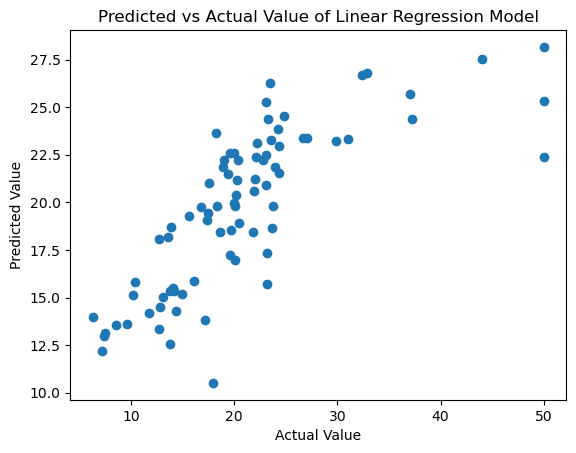

In [14]:
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Linear Regression Model')
plt.show()

#### Guidelines on number of hidden layers and neurons per hidden layer in a neural network

- If the data is linearly separable then you don't need any hidden layers at all. 
- If data is less complex and is having fewer dimensions or features then neural networks with 1 to 2 hidden layers would work.
- If data is having large dimensions or features then to get an optimum solution, 3 to 5 hidden layers can be used.

#### Guidelines on number of neurons for the first hidden layer in a neural network

- The number of hidden neurons should be between the size of the input layer and the size of the output layer.

- The number of hidden neurons should be 2/3 the size of the input layer, plus the size of the output layer.

- The number of hidden neurons should be less than twice the size of the input layer.

- The appropriate number could be:
$\sqrt{No. of Input Layer Nodes \times No. of Output Layer Nodes}$

### Neural Network with 1 hidden layer

In [15]:

model2 = tf.keras.Sequential([
    tf.keras.Input(shape= (X_train.shape[1],) ),
    tf.keras.layers.Dense(units=4, activation='relu', kernel_regularizer=tf.keras.regularizers.L2(0.01)),
    tf.keras.layers.Dense(units=1, activation='linear', kernel_regularizer=tf.keras.regularizers.L2(0.01))
])
model2.compile(loss='mean_absolute_error',
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.1))
model2.fit(
    X_train,
    y_train,
    batch_size=1000,
    epochs=500)

Epoch 1/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 22.5330
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 67ms/step - loss: 21.9583
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step - loss: 21.1432
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 19.9926
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 18.5662
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - loss: 16.8772
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 230ms/step - loss: 15.0251
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 13.1408
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - loss: 11.4454
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step - loss: 10.2281
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step - loss: 9.6291
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - loss: 9.7541
Epoch 13/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.2986
Epoch 14/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step - loss: 10.8842
Epoch 15/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 11.0730
Epoch 

In [16]:
y_pred2 = model2.predict(X_test)
loss2 = model2.evaluate(X_test, y_test)
# Compute the R^2 score
r2_2 = r2_score(y_test, y_pred2)

print('R2 score:', r2_2)
print('Loss (Mean error per testing example):', loss2)

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 4.5990  
R2 score: 0.7005214749085149
Loss (Mean error per testing example): 4.516253471374512


#### Plotting Predicted vs Actual Value of Neural Network Regression Model

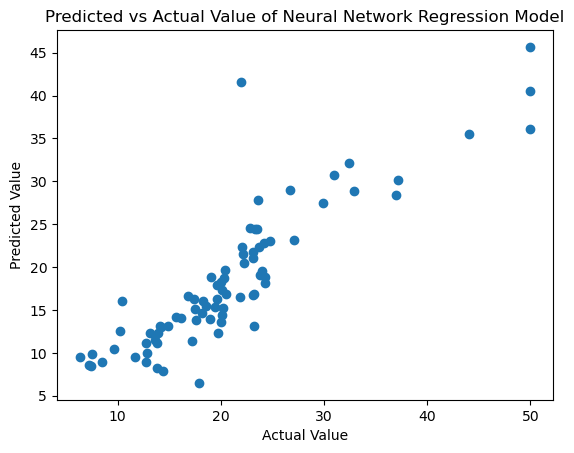

In [17]:
plt.scatter(y_test, y_pred2)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.title('Predicted vs Actual Value of Neural Network Regression Model')
plt.show()

#### Linear Regression vs Neural Network Predictions

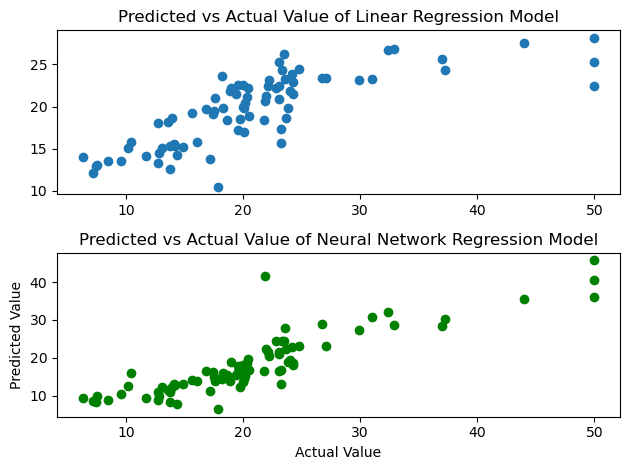

In [18]:
fig, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.scatter(y_test, y_pred)
ax1.set_title('Predicted vs Actual Value of Linear Regression Model')
ax2.set_xlabel('Actual Value')
ax2.set_ylabel('Predicted Value')
ax2.set_title('Predicted vs Actual Value of Neural Network Regression Model')
ax2.scatter(y_test, y_pred2, c='green')
plt.tight_layout()
plt.show()